# Statistics and Politics
### By Musa Rasheed

We are provided with 2 data sets to clean and analyze in python. They contain data about how many votes per county, and the data about that county such as median age, demographic, health statistics, occupations, etc. I will use these to draw conclusions based on the data. 


Let us first import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#loading the CSV files into the data frames. 
votes_df = pd.read_csv('votes.csv')
data_df = pd.read_csv('data.csv')

In [2]:
#taking a look at both tables
print(votes_df.shape)
votes_df.head()

(3141, 6)


,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,0,2630.0,3887.0,2364.0,3967.0,5043
1,1,2099.0,4263.0,1587.0,4917.0,5087
2,2,1845.0,4136.0,1544.0,4353.0,13159
3,3,12792.0,9411.0,12652.0,8153.0,8037
4,4,2442.0,5214.0,1836.0,5021.0,13091


In [3]:
print(data_df.shape)
data_df.head().transpose()#done so that we can clearly see all columns without scrolling right

(3141, 54)


,0,1,2,3,4
State,Arkansas,Arkansas,Georgia,Colorado,Georgia
ST,AR,AR,GA,CO,GA
Fips,5043,5087,13159,8037,13091
County,"Drew County, Arkansas","Madison County, Arkansas","Jasper County, Georgia","Eagle County, Colorado","Dodge County, Georgia"
Precincts,17,20,3,30,16
Votes,6590,6829,6016,22611,6995
Less Than High School Diploma,19.4,24.2,21.7,12.8,23.1
At Least High School Diploma,80.6,75.8,78.3,87.2,76.9
At Least Bachelors's Degree,19.4,13.4,13.3,45.9,13.8
Graduate Degree,5.7,4.1,5.6,11.7,4.8


---
## Cleaning the data
Now that we have an idea of what the data looks like, we can begin the cleaning process. Let us first assess the cleanliness of the data. To do this, I will

1. Look for Null rows or columns
2. Look for duplicate rows or columns (and drop/delete them)
3. Either delete or fill in missing values in rows.


---

### Step 1: Look for Null rows or columns
These are rows that have missing data in them, and have null values represented by NaN. 

In [4]:
print(votes_df.isna().sum())
print(data_df.isna().sum())

Unnamed: 0                0
Democrats_12(Votes)      31
Republicans_12(Votes)    31
Democrats_16(Votes)      32
Republicans_16(Votes)    32
Fips                      0
dtype: int64
State                                                            0
ST                                                               1
Fips                                                             0
County                                                           0
Precincts                                                       32
Votes                                                           32
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Lati

#### Row Deletion
We can see that quite a bit of data seems to be missing from both tables. Now while we could make the effort to fill all of these rows in, we can afford to delete a few entries as long as we don't remove more than 3% from the total. 

The votes table has only 32 rows which makes up $\frac{32}{3141}$ = 1.02%, which is a negligble loss (based on our 3% rule of thumb). 

We also see that we have 32 rows missing from the data_df as well. We can look at both of them to see if they are related by creating a full outer join on the FIPS column (since no entries are missing in that column) and seeing if they match:

In [5]:
null_votes = votes_df[votes_df['Democrats_12(Votes)'].isna()]
null_data = data_df[data_df['Votes'].isna()]

pd.merge(null_votes, null_data, on = 'Fips', how = 'outer')

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips,State,ST,County,Precincts,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,139.0,NaN,NaN,NaN,NaN,2110,Alaska,AK,"Juneau City and Borough, Alaska",NaN,...,0.260,0.063,506.8,94.8,0.204,0.049,460.03,NaN,65.9,NaN
1,140.0,NaN,NaN,NaN,NaN,2170,Alaska,AK,"Matanuska-Susitna Borough, Alaska",NaN,...,0.298,0.068,467.7,39.8,0.217,0.080,NaN,4.95,79.5,4.2
2,397.0,NaN,NaN,NaN,NaN,2068,Alaska,AK,"Denali Borough, Alaska",NaN,...,0.247,0.068,269.5,NaN,0.193,0.102,NaN,NaN,NaN,NaN
3,472.0,NaN,NaN,NaN,NaN,2100,Alaska,AK,"Haines Borough, Alaska",NaN,...,0.296,0.083,195.8,NaN,0.282,0.081,541.11,NaN,NaN,NaN
4,684.0,NaN,NaN,NaN,NaN,2275,Alaska,AK,"Wrangell City and Borough, Alaska",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,889.0,NaN,NaN,NaN,NaN,2185,Alaska,AK,"North Slope Borough, Alaska",NaN,...,0.356,0.076,1189.1,NaN,0.241,0.053,921.62,NaN,106.3,NaN
6,1284.0,NaN,NaN,NaN,NaN,2050,Alaska,AK,"Bethel Census Area, Alaska",NaN,...,0.315,0.067,2222.1,166.2,0.287,0.152,NaN,12.77,153.4,11.5
7,1285.0,NaN,NaN,NaN,NaN,2270,Alaska,AK,"Wade Hampton Census Area, Alaska",NaN,...,0.276,0.067,2701.6,115.0,0.301,0.215,NaN,19.37,224.4,14.6
8,1286.0,NaN,NaN,NaN,NaN,2188,Alaska,AK,"Northwest Arctic Borough, Alaska",NaN,...,0.297,0.072,2754.4,NaN,0.292,0.151,NaN,NaN,195.4,NaN
9,1376.0,NaN,NaN,NaN,NaN,2090,Alaska,AK,"Fairbanks North Star Borough, Alaska",NaN,...,0.291,0.061,760.1,69.0,0.211,0.062,NaN,4.92,63.4,5.2


It appears they are one and the same, and so we can drop the 32 rows from both tables.

In [6]:
data_df[data_df['Votes'].isna()].index

Int64Index([ 139,  140,  397,  472,  684,  889, 1284, 1285, 1286, 1376, 1560,
            1685, 2265, 2480, 2481, 2482, 2565, 2675, 2764, 2920, 2961, 3036,
            3071, 3072, 3100, 3101, 3102, 3103, 3112, 3113, 3114, 3115],
           dtype='int64')

In [7]:
votes_df[votes_df['Democrats_16(Votes)'].isna()].index

Int64Index([ 139,  140,  397,  472,  684,  889, 1284, 1285, 1286, 1376, 1560,
            1685, 2265, 2480, 2481, 2482, 2565, 2675, 2764, 2920, 2961, 3036,
            3071, 3072, 3100, 3101, 3102, 3103, 3112, 3113, 3114, 3115],
           dtype='int64')

In [8]:
votes_df.drop([139,  140,  397,  472,  684,  889, 1284, 1285, 1286, 1376, 1560,
            1685, 2265, 2480, 2481, 2482, 2565, 2675, 2764, 2920, 2961, 3036,
            3071, 3072, 3100, 3101, 3102, 3103, 3112, 3113, 3114, 3115], inplace = True)
data_df.drop([139,  140,  397,  472,  684,  889, 1284, 1285, 1286, 1376, 1560,
            1685, 2265, 2480, 2481, 2482, 2565, 2675, 2764, 2920, 2961, 3036,
            3071, 3072, 3100, 3101, 3102, 3103, 3112, 3113, 3114, 3115], inplace = True)

In [9]:
votes_df.isna().sum()

Unnamed: 0               0
Democrats_12(Votes)      0
Republicans_12(Votes)    0
Democrats_16(Votes)      0
Republicans_16(Votes)    0
Fips                     0
dtype: int64

We have solved the null rows issue for **votes_df**, and can now focus our attention to **data_df**.

In [10]:
data_df.isna().sum()

State                                                            0
ST                                                               0
Fips                                                             0
County                                                           0
Precincts                                                        0
Votes                                                            0
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

We can see we have even more data missing, there are a few columns with missing entries that make up a small fraction of the total. We can afford to drop 8 more rows, as based on our 3% rule of thumb: 

$3141*3\% = 94$ Rows.

In total, we are deleting 40 rows, which makes up only 1.3% of the total. We will delete from: 
    
    Preschool.Enrollment.Ratio.enrolled.ages.3.and.4 (7 Rows)
    & 
    Children.in.single.parent.households (1 Row)


In [11]:
print(data_df[data_df['Children.in.single.parent.households'].isna()].index)
print(data_df[data_df['Preschool.Enrollment.Ratio.enrolled.ages.3.and.4'].isna()].index)

Int64Index([338], dtype='int64')
Int64Index([276, 338, 713, 745, 1108, 2121, 2251], dtype='int64')


In [12]:
#This is convinent! We are only dropping 7 rows since row 338 appears in both sets!
data_df.drop([276, 338, 713, 745, 1108, 2121, 2251], inplace = True)

In [13]:
data_df.isna().sum()

State                                                            0
ST                                                               0
Fips                                                             0
County                                                           0
Precincts                                                        0
Votes                                                            0
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

We will now turn our attention to: 

1. Teen.births
2. Adult.smoking
3. Sexually.transmitted.infections
4. Violent.crime
5. Injury.deaths
6. Low.birthweight

These 5 have a reasonable amount of missing entries compared to the rest. We have a few options to fill in the missing data: 

1. Fill it in with the mean or mode
2. Use an ffill function
3. Use a bfill function

For this, I will choose to use the ffill function. This is because this data varies quite a bit from county to county, so using the mean is not a viable option for a whole country. I will order by the FIPS code in order to group the counties together, then initiate a forward fill. The first 2 digits of the FIPS code represent the state, while the last 3 represent the county. Some of the Fips codes only have 4 digits, meaning the 1st digit must be 0 and was omitted. In order to make the 0 appear, I will use the **.apply** function: 

This is running on the assumption that counties have similair statistics, and it is much better than comparing someone from North Carolina to someone in California for example. 

In [14]:
data_df['Fips'] = data_df['Fips'].apply(lambda x: '{0:0>5}'.format(x))

In [15]:
#Columns I can reasonably fill.
cols = ['Teen.births','Adult.smoking','Sexually.transmitted.infections','Violent.crime','Injury.deaths','Low.birthweight']

data_df.sort_values(by = 'Fips',inplace = True) #Sorting based on the fips number
data_df.loc[:,cols] = data_df.loc[:,cols].ffill() #filling in missing values in the specific columns in "cols"
data_df.sort_index(inplace = True) #resetting the index to its original order before sorting.
data_df = data_df.astype({'Fips':np.int64})

#df = df.astype({"a": int, "b": complex})

This has the consequence of changing Fips to type Object. We can fix that later if necessary using the **.asype** function. For now, let's ffill our missing rows:

In [16]:
data_df.isna().sum()

State                                                            0
ST                                                               0
Fips                                                             0
County                                                           0
Precincts                                                        0
Votes                                                            0
Less Than High School Diploma                                    0
At Least High School Diploma                                     0
At Least Bachelors's Degree                                      0
Graduate Degree                                                  0
School Enrollment                                                0
Median Earnings 2010                                             0
White (Not Latino) Population                                    0
African American Population                                      0
Native American Population                                    

In [17]:
data_df.head(10)

,State,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,...,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Arkansas,AR,5043,"Drew County, Arkansas",17.0,6590.0,19.4,80.6,19.4,5.7,...,0.323,0.126,747.3,79.9,0.197,0.108,449.02,NaN,82.0,NaN
1,Arkansas,AR,5087,"Madison County, Arkansas",20.0,6829.0,24.2,75.8,13.4,4.1,...,0.328,0.135,247.2,131.3,0.239,0.053,245.83,NaN,96.8,NaN
2,Georgia,GA,13159,"Jasper County, Georgia",3.0,6016.0,21.7,78.3,13.3,5.6,...,0.298,0.118,324.1,402.4,0.239,0.096,205.60,NaN,71.6,NaN
3,Colorado,CO,8037,"Eagle County, Colorado",30.0,22611.0,12.8,87.2,45.9,11.7,...,0.132,0.036,190.9,133.7,0.230,0.081,123.88,NaN,42.9,3.5
4,Georgia,GA,13091,"Dodge County, Georgia",16.0,6995.0,23.1,76.9,13.8,4.8,...,0.358,0.153,497.9,315.8,0.208,0.115,477.48,8.11,79.4,NaN
5,California,CA,6025,"Imperial County, California",189.0,41751.0,37.7,62.3,12.2,4.0,...,0.235,0.074,429.2,146.1,0.228,0.283,326.13,3.22,46.1,4.3
6,Georgia,GA,13059,"Clarke County, Georgia",24.0,44221.0,15.7,84.3,41.2,19.3,...,0.267,0.090,768.7,288.7,0.243,0.070,369.83,5.03,44.8,9.1
7,Colorado,CO,8125,"Yuma County, Colorado",15.0,4664.0,16.4,83.6,17.8,4.5,...,0.251,0.060,89.1,110.9,0.231,0.040,66.82,NaN,66.7,NaN
8,Colorado,CO,8099,"Prowers County, Colorado",14.0,4978.0,19.5,80.5,18.3,7.2,...,0.255,0.073,390.5,89.6,0.226,0.065,102.68,NaN,92.7,NaN
9,Georgia,GA,13045,"Carroll County, Georgia",30.0,43744.0,21.2,78.8,18.3,6.7,...,0.314,0.129,409.3,224.1,0.226,0.097,572.92,4.94,74.2,7.3


We have now dealt with the majority of the Null entries. Now comes the matter of the columns with many entries missing. 

### Dropping Columns

Certain columns are unecessary or problematic. For example, the state and ST columns are one in the same, one simply uses the state abbreviation. We can do without the "State" column to clean things up a bit: 


In [18]:
data_df.drop(['State'], axis = 1, inplace = True);

Certain columns have a large amount of data missing. While we could fill these rows in, some have more than a quarter of their entries missing. Filling them in could result in implicit biases being inserted into the data. This means the unfortunate removal of these columns, columns who have more than 25% of their data missing.

$3141*25\% = 777$ rows. 

Luckily, some of these rows have very little impact on the US, for example infant mortality is at 0.58% compared to the global average of 2.9% (nearly 1/5th of the global statistic). 

In [19]:
data_df.drop(['Infant.mortality','Homicide.rate','HIV.prevalence.rate'],
             axis = 1, inplace = True)
data_df.shape

(3102, 50)

In [20]:
data_df.isna().sum()

ST                                                            0
Fips                                                          0
County                                                        0
Precincts                                                     0
Votes                                                         0
Less Than High School Diploma                                 0
At Least High School Diploma                                  0
At Least Bachelors's Degree                                   0
Graduate Degree                                               0
School Enrollment                                             0
Median Earnings 2010                                          0
White (Not Latino) Population                                 0
African American Population                                   0
Native American Population                                    0
Asian American Population                                     0
Other Race or Races                     

<br>

#### Check for row and column duplicates

In [21]:
#the following looks for duplicate rows in both tables
print(votes_df.duplicated().sum())
print(data_df.duplicated().sum())

0
0


It's great news that there aren't any duplicate rows, however the columns are a different matter. The votes data frame is fine, but there seems to be repeat information on the data_df. The following function will return all rows where the 2 columns differ: 

In [22]:
data_df.loc[(data_df['White (Not Latino) Population'])!=(data_df['White'])]

,ST,Fips,County,Precincts,Votes,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,...,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,Injury.deaths


Clearly we have duplicate rows in the demographics columns. Let's begin by first comparing, then dropping all duplicate race rows:

In [23]:
print(len(data_df.loc[(data_df['Black'])!=(data_df['African American Population'])]))
print(len(data_df.loc[(data_df['Asian'])!=(data_df['Asian American Population'])]))
print(len(data_df.loc[(data_df['Other'])!=(data_df['Other Race or Races'])]))
print(len(data_df.loc[(data_df['Hispanic'])!=(data_df['Latino Population'])]))
print(len(data_df.loc[(data_df['Amerindian'])!=(data_df['Native American Population'])]))

0
0
0
0
0


As you can see, this contains duplicate information which clutters the data_df. I will drop the longer named rows for ease of typing.

In [24]:
data_df.drop(['African American Population',
              'Asian American Population',
              'Other Race or Races',
              'Latino Population',
              'Native American Population'],
              axis = 1, inplace = True)
data_df.shape

(3102, 45)

-----

#### Data Augmentation

This is a final step to make analysis easier. I will create a table from the votes table that will have: 

1. The FIPS number
2. The democratic vote share in 2016
3. The republican vote share in 2016

I will then join this data frame with the data_df

In [25]:
votes_df.head(5)

,Unnamed: 0,Democrats_12(Votes),Republicans_12(Votes),Democrats_16(Votes),Republicans_16(Votes),Fips
0,0,2630.0,3887.0,2364.0,3967.0,5043
1,1,2099.0,4263.0,1587.0,4917.0,5087
2,2,1845.0,4136.0,1544.0,4353.0,13159
3,3,12792.0,9411.0,12652.0,8153.0,8037
4,4,2442.0,5214.0,1836.0,5021.0,13091


In [26]:
d16votes = votes_df['Democrats_16(Votes)']
r16votes = votes_df['Republicans_16(Votes)']


vote_summarydict = {'Fips': votes_df['Fips'], 
                   'Democratic_vote_share(2016)': (d16votes/(d16votes+r16votes))*100,
                   'Republican_vote_share(2016)': (r16votes/(d16votes+r16votes))*100}

vote_summarydf = pd.DataFrame.from_dict(vote_summarydict)

In [27]:
vote_summarydf

,Fips,Democratic_vote_share(2016),Republican_vote_share(2016)
0,5043,37.340073,62.659927
1,5087,24.400369,75.599631
2,13159,26.182805,73.817195
3,8037,60.812305,39.187695
4,13091,26.775558,73.224442
...,...,...,...
3136,39017,35.186576,64.813424
3137,39091,22.546340,77.453660
3138,39093,49.851117,50.148883
3139,40021,35.314301,64.685699


In [28]:
#Now to join the 2 tables. I'll perform a right join to make sure I include all the data_df entries. 

full_df = pd.merge(vote_summarydf,data_df, on = 'Fips', how = 'right')







## Exploratory Data Analysis
I will now explore the data. I will grab 5 columns and analyze what they are measuring. 

---

#### Less Than High School Diploma, At Least High School Diploma, At Least Bachelors's Degree, graduates school

These are measuring the level of education the county has. One popular statistic people used during the 2016 election was the level of education vs. who someone would vote for. While this can be seen as a jab at voters intellgence, it is more professionally used to see what types of values are important for those fortunate enough to receive an education and those who decided college was not the right path for them. This can also reveal the types of opportunities available to those in the county. This is measured as a percentage of the total county population. 


#### Adult.smoking, Adult.obesity, Diabetes

This is used to assess the health of the population. Smoking, obesity and diabetes are some of the leading causes of death among americans. While this may seem grim, this is actually a good sign. It shows they are dying of natural causes rather than in Uganada where the leading cause is Malaria (A preventable disease). These are percentages of the total population. 

#### Teen.births
This measures the amount of teenage mothers in a county. Teenage births can be caused by a range of factors; rape, restrictive abortion laws, lack of contraceptives, poor sexual education, religious reasons, etc. This is most often used to see which states have better abortion laws or better sexual education. This is a measure of how many births there were in the county. 

#### Gini.Coefficient
This is a measure used to determine the income inequality (based on the capitalst economic model) in an area. The X-axis has the share of people in the lowest to highest incomes (from 0-1), while the Y-axis has the share of all income earned (from 0-1). A linear 45 degree line indicates an area with perfect equality. The larger the coefficient, the greater the inequality. It's a percentage. 

#### Children Under 6 Living in Poverty, Adults 65 and Older Living in Poverty     
The 2 extremes of poverty. Children and the elderly who live in poverty in the county. Not much more has to be explained other than the fact that both are a percentage. 

<br>
<br>


## Visualisations

I will now create 5 visualizations to discover trends in the data. 

Text(0.5, 1, 'Republican Median Age')

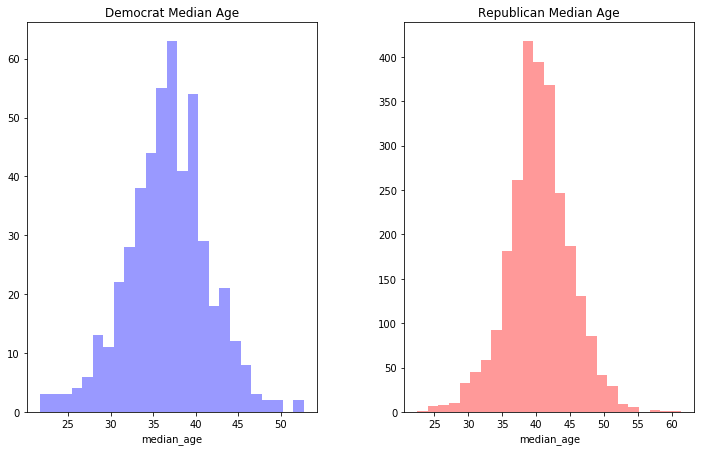

In [29]:
#adjusting graph size
fig, ax =plt.subplots(1,2, figsize=(10, 6))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

#data
dmaj = full_df[full_df['Democratic_vote_share(2016)']>50] # majority democrat
rmaj = full_df[full_df['Republican_vote_share(2016)']>50] # majority republican

#types of graphs
sns.distplot(dmaj['median_age'], kde = False, ax = ax[0], color = 'blue', bins = 25).set_title("Democrat Median Age")
sns.distplot(rmaj['median_age'], kde = False, ax = ax[1], color = 'red', bins = 25).set_title("Republican Median Age")


* The median age for republican counties seem to be around 40-45 while the democrats are arounf 35-40 years old. 

Text(0.5, 1, 'Bivariate Density Plot')

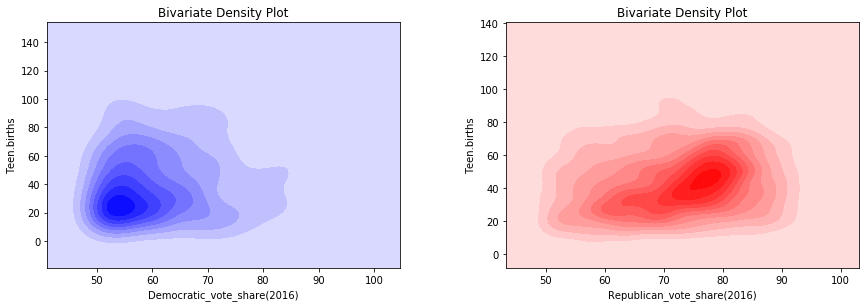

In [30]:
# Sizing subplots
fig,ax = plt.subplots(1,2, figsize=(12, 4))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3)

#data
dmaj = full_df[full_df['Democratic_vote_share(2016)']>50] # majority democrat
rmaj = full_df[full_df['Republican_vote_share(2016)']>50] # majority republican

#plot
sns.kdeplot(dmaj['Democratic_vote_share(2016)'], dmaj['Teen.births'], shade=True, color = 'Blue', ax = ax[0]).set_title("Bivariate Density Plot")
sns.kdeplot(rmaj['Republican_vote_share(2016)'], rmaj['Teen.births'], shade=True, color = 'Red', ax = ax[1]).set_title("Bivariate Density Plot")

* The teen birth rate for democratic majorities are more concentrated to the lower end, but gets more spread out as the votershare increases
* the republicans are more spread out, with a consistent teen birthrate.

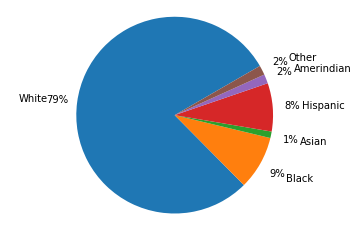

In [31]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'White', 'Black', 'Asian', 'Hispanic','Amerindian', 'Other'
sizes = [full_df['White'].mean(),
         full_df['Black'].mean(),
         full_df['Asian'].mean(),
         full_df['Hispanic'].mean(),
         full_df['Amerindian'].mean(),
         full_df['Other'].mean()]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, radius = 20, autopct='%1.0f%%', startangle=30, labeldistance  = 1.3, pctdistance = 1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

* The average voter is white, followed by black and hispanic

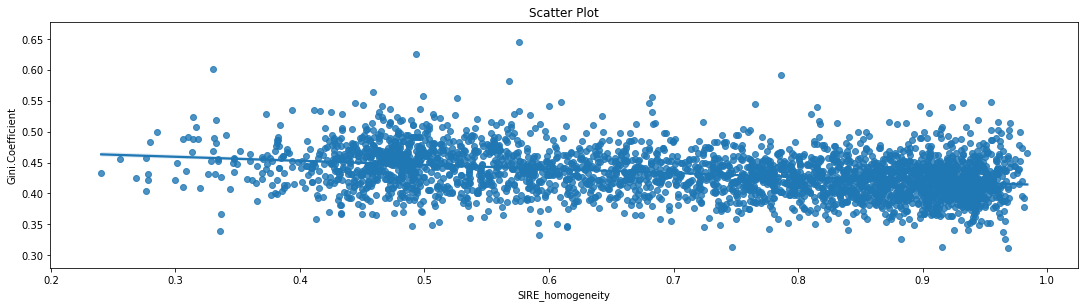

In [32]:
fig, ax =plt.subplots(1,1, figsize=(15, 4))
fig.tight_layout()
fig.subplots_adjust(wspace = 0.3)

sns.regplot(x=full_df['SIRE_homogeneity'], y=full_df['Gini.Coefficient']).set_title("Scatter Plot")
plt.show()



* the Gini coefficient measures economic inequality whie the SIRE measures racial diversity. There seems to be no strong correlation between the two. 

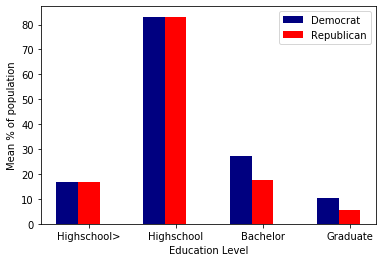

In [38]:
#data
dmaj = full_df[full_df['Democratic_vote_share(2016)']>50] # majority democrat
rmaj = full_df[full_df['Republican_vote_share(2016)']>50] # majority republican

bars1 = [dmaj['Less Than High School Diploma'].mean(),
         dmaj['At Least High School Diploma'].mean(),
         dmaj["At Least Bachelors's Degree"].mean(),
         dmaj["Graduate Degree"].mean(),]


bars2 = [rmaj['Less Than High School Diploma'].mean(),
         rmaj['At Least High School Diploma'].mean(),
         rmaj["At Least Bachelors's Degree"].mean(),
         rmaj["Graduate Degree"].mean(),] 



 
# Make the plot
r1 = np.arange(len(bars1))
r2 = [x + 0.25 for x in r1]
plt.bar(r1, bars1, color='navy', width=0.25, label='Democrat')
plt.bar(r2, bars2, color='red', width=0.25, label='Republican')
 
#Add labels
plt.ylabel('Mean % of population')
plt.xlabel('Education Level')
plt.xticks([r + 0.25 for r in range(len(bars1))], ['Highschool>', 'Highschool', 'Bachelor', 'Graduate'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

* The level of education is similiar up until university, where the democratic voters have an edge over republican voters. Most complete the highschool level.  